# Predictive ML Project
**Author**: Kiruthikaa NS
**Repo Name**: `datafun-07-ml`
**Date**: June 2025  
**GitHub Repo**: [View this project on GitHub](https://github.com/Kiruthikaa2512/datafun-07-ml/kiru_ml.ipynb)  


In [205]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## Part 1 - Chart a Straight Line
In this section, we demonstrate a linear relationship using the equation for converting Celsius to Fahrenheit:

**Fahrenheit = (9/5) × Celsius + 32**

This follows the standard linear form:  
**y = mx + b**, where:  
- *m = 9/5* (the slope)  
- *b = 32* (the y-intercept)

We'll plot Celsius temperatures from 0°C to 90°C in increments of 10, and calculate their corresponding Fahrenheit values using the formula above.

In [206]:
celsius = np.arange(0, 100, 10)
fahrenheit = (9/5) * celsius + 32
df = pd.DataFrame({'Celsius': celsius, 'Fahrenheit': fahrenheit})
print(df)


   Celsius  Fahrenheit
0        0        32.0
1       10        50.0
2       20        68.0
3       30        86.0
4       40       104.0
5       50       122.0
6       60       140.0
7       70       158.0
8       80       176.0
9       90       194.0


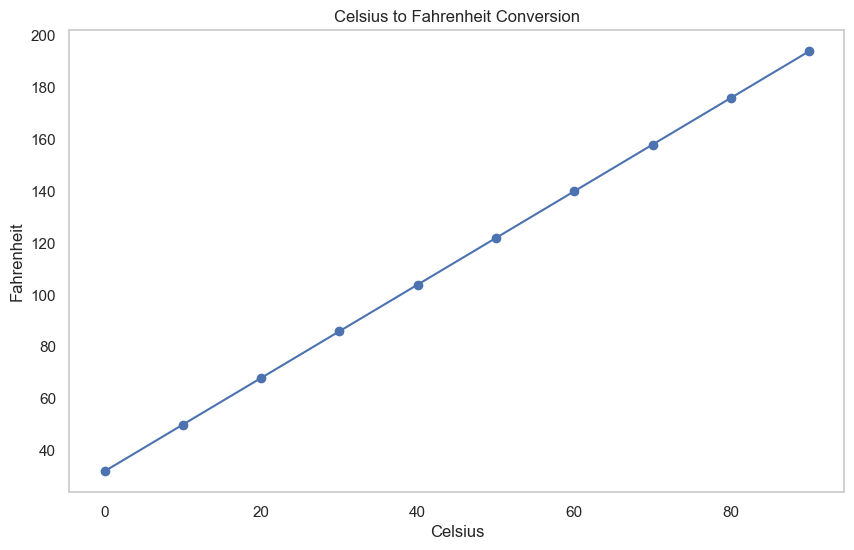

In [207]:
# Plotting the data
plt.figure(figsize=(10, 6))
plt.plot(df['Celsius'], df['Fahrenheit'], marker='o', linestyle='-', color='b', label='Fahrenheit')
plt.title('Celsius to Fahrenheit Conversion')
plt.xlabel('Celsius')
plt.ylabel('Fahrenheit')
plt.grid()
plt.savefig('output/celsius_to_fahrenheit.png')
plt.show()

### Observation - Line Chart of Celcius to Fahrenheit Conversion

The plotted line shows a consistent upward trend—this reflects the direct linear relationship between Celsius and Fahrenheit temperatures. As Celsius increases by 10°, Fahrenheit increases by 18°, confirming the slope of 9/5.

The line is straight and evenly spaced, validating that temperature conversion between these two units is indeed a **linear transformation**. This reinforces our understanding of how `y = mx + b` models real-world data.

## Part 2 - Prediction.

### Section 1 - Data Acquisition

In [208]:
nyc_df = pd.read_csv('ave_hi_nyc_jan_1895-2018.csv')

### Section 2 - Data Inspection

In [209]:
print("\n First 5 rows of the NYC DataFrame:")
print(nyc_df.head())
print("\n Last 5 rows of the NYC DataFrame:")
print (nyc_df.tail())


 First 5 rows of the NYC DataFrame:
     Date  Value  Anomaly
0  189501   34.2     -3.2
1  189601   34.7     -2.7
2  189701   35.5     -1.9
3  189801   39.6      2.2
4  189901   36.4     -1.0

 Last 5 rows of the NYC DataFrame:
       Date  Value  Anomaly
119  201401   35.5     -1.9
120  201501   36.1     -1.3
121  201601   40.8      3.4
122  201701   42.8      5.4
123  201801   38.7      1.3


### Section 3: Data Cleaning

In [210]:
nyc_df.columns = ['Date', 'Temperature', 'Anomaly']
nyc_df.Date = nyc_df.Date.floordiv(100)
# Renaming columns for clarity
nyc_df.rename(columns={'Date': 'Year', 'Value': 'Temperature', 'Anomaly': 'Anomalies'}, inplace=True)
# print the renamed DataFrame
print("\n Renamed NYC DataFrame:")
print(nyc_df.columns)
# Save cleaned data
nyc_df.to_csv("Cleaned_NYC_Jan.csv", index=False)
# Show first 5 rows
print(nyc_df.head())



 Renamed NYC DataFrame:
Index(['Year', 'Temperature', 'Anomalies'], dtype='object')
   Year  Temperature  Anomalies
0  1895         34.2       -3.2
1  1896         34.7       -2.7
2  1897         35.5       -1.9
3  1898         39.6        2.2
4  1899         36.4       -1.0


### Data cleaned: columns renamed, year extracted and the cleaned data has been saved as CSV in the name of Cleaned NYC_Jan.csv

### Section 4: Descriptive Statistics

In [211]:
# Precision setting for better readability
pd.set_option('display.precision', 2)

# Show descriptive statistics for numeric columns only (exclude 'Date')
print("\nDescriptive statistics of the NYC DataFrame:")
print(nyc_df.describe(include=[float, int]))

# Calculate basic descriptive stats for Temperature
mean_temp = nyc_df['Temperature'].mean()
median_temp = nyc_df['Temperature'].median()
std_temp = nyc_df['Temperature'].std()
min_temp = nyc_df['Temperature'].min()
max_temp = nyc_df['Temperature'].max()

print(f"\nTemperature stats: mean={mean_temp:.2f}, median={median_temp:.2f}, std={std_temp:.2f}, min={min_temp:.2f}, max={max_temp:.2f}")



Descriptive statistics of the NYC DataFrame:
          Year  Temperature  Anomalies
count   124.00       124.00     124.00
mean   1956.50        37.60       0.20
std      35.94         4.54       4.54
min    1895.00        26.10     -11.30
25%    1925.75        34.58      -2.82
50%    1956.50        37.60       0.20
75%    1987.25        40.60       3.20
max    2018.00        47.60      10.20

Temperature stats: mean=37.60, median=37.60, std=4.54, min=26.10, max=47.60


### Summary of Descriptive Statistics

This dataset spans 124 years of January average high temperatures in New York City. The average (mean) and median temperature are both 37.60°F, suggesting a relatively symmetrical distribution.

The minimum and maximum temperatures recorded are 26.10°F and 47.60°F, respectively, indicating a moderate spread in the data. The standard deviation is 4.54°F, reflecting some natural variability in winter climate patterns over time.

Anomalies range from -11.30°F to 10.20°F, confirming both colder and warmer deviations from the baseline. These values will help inform the linear regression model we'll build in the next step.

### Section 5 - Build the Model


In [219]:
# Perform linear regression: Temperature as a function of Year
linear_regression = stats.linregress(x=nyc_df.Year, y=nyc_df.Temperature)
linear_regression.slope
print(f"\nLinear regression slope: {linear_regression.slope:.2f}")
linear_regression.intercept
print(f"Linear regression intercept: {linear_regression.intercept:.2f}")


Linear regression slope: 0.01
Linear regression intercept: 8.69


### Section 6: Predict

In [226]:
# Average high temperature in January 2024 prediction
predicted_temp_2024 = linear_regression.slope * 2024 + linear_regression.intercept
print(f"Predicted average high temperature in Jan 2024: {predicted_temp_2024:.2f}")


Predicted average high temperature in Jan 2024: 38.59


### Section 7: Visualizations

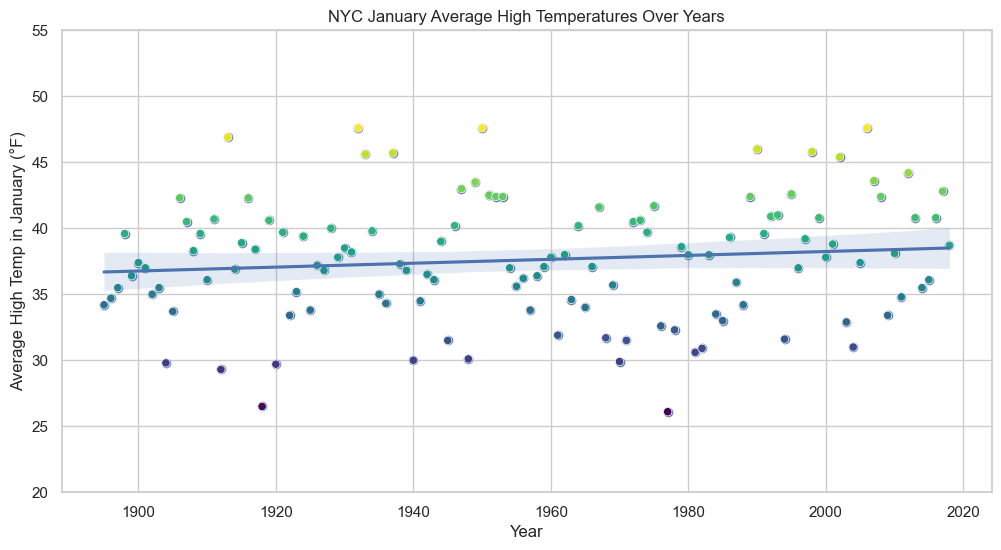

In [250]:
# Create scatter plot with regression line (best fit line)
sns.set_style('whitegrid')
plt.figure(figsize=(12, 6))
axes = sns.regplot(x=nyc_df.Year, y=nyc_df.Temperature)

# Customize axes labels and title
plt.xlabel('Year')
plt.ylabel('Average High Temp in January (°F)')
plt.title('NYC January Average High Temperatures Over Years')
plt.ylim(20, 55) 
sns.scatterplot(
    x='Year', 
    y='Temperature', 
    hue='Temperature', 
    palette='viridis', 
    data=nyc_df, 
    legend=False
)
plt.show()

## Part 3: Prediction

### Section 1. Build the Model

In [255]:
# Prepare features and target
x=nyc_df[['Year']]
y=nyc_df['Temperature']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Print the model's coefficients
print(f"Slope (m): {model.coef_[0]:.4f}")
print(f"Intercept (b): {model.intercept_:.2f}")

Training set shape: (99, 1)
Testing set shape: (25, 1)
Slope (m): 0.0120
Intercept (b): 13.79


### Section 2: Test the Model

In [264]:
# Extract slope and intercept
slope = linear_regression.slope
intercept = linear_regression.intercept

# Predict using the line equation: y = mx + b
predicted = model.predict(X_test)
print(f"Predicted values: {predicted[:5]}")
expected = y_test

# Display some predicted vs. expected values
for p, e in zip(predicted[::5], expected[::5]):
    print(f"Predicted: {float(p):.2f}, Expected: {float(e):.2f}")

Predicted values: [36.77453248 37.06284164 36.99076435 37.47127961 37.19498334]
Predicted: 36.77, Expected: 46.90
Predicted: 37.64, Expected: 33.00
Predicted: 36.88, Expected: 33.40
Predicted: 37.48, Expected: 40.50
Predicted: 37.12, Expected: 36.50


### Section 3: Predict 

In [265]:
# Predict the NYC average high in Jan 2024
future_year = pd.DataFrame([[2024]], columns=['Year'])
predicted_temp = model.predict(future_year)

print(f"Predicted January average high temperature in NYC for 2024: {predicted_temp[0]:.2f}°F")

Predicted January average high temperature in NYC for 2024: 38.11°F


### Section 3: Visualizations

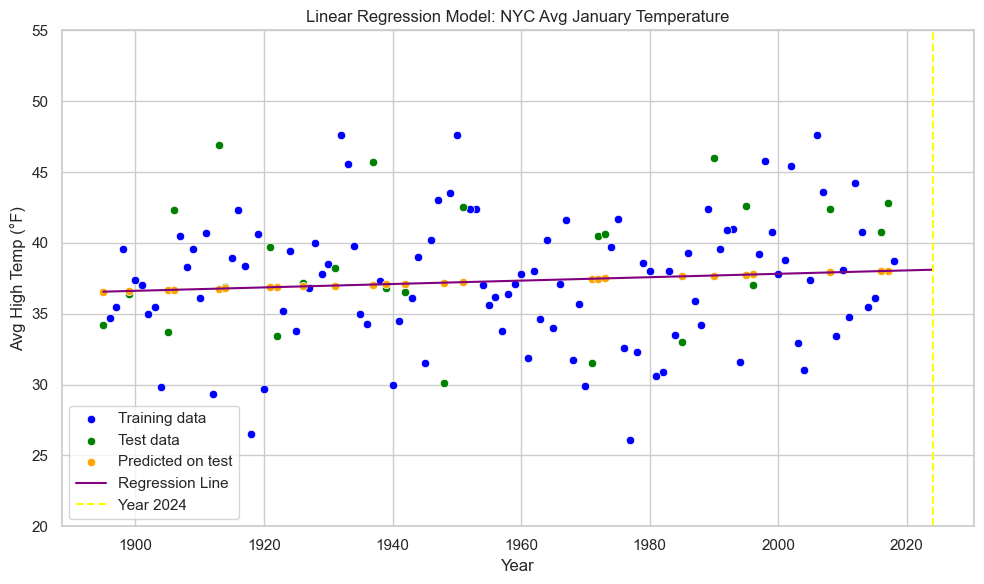

In [266]:
# Predict on the test set
y_pred = model.predict(X_test)

# Set up the figure
plt.figure(figsize=(10, 6))
sns.set_theme(style='whitegrid')

# 1. Plot training data
sns.scatterplot(x=X_train['Year'], y=y_train, color='blue', label='Training data')

# 2. Plot test data
sns.scatterplot(x=X_test['Year'], y=y_test, color='green', label='Test data')

# 3. Plot predictions on test data
sns.scatterplot(x=X_test['Year'], y=y_pred, color='orange', label='Predicted on test')

# 4. Regression line across all years + 2024
years_extended = pd.DataFrame(np.linspace(nyc_df['Year'].min(), 2024, 500), columns=['Year'])
predicted_line = model.predict(years_extended)
plt.plot(years_extended['Year'], predicted_line, color='purple', label='Regression Line')

# 5. Highlight prediction year
plt.axvline(x=2024, color='yellow', linestyle='--', label='Year 2024')

# Aesthetics
plt.title('Linear Regression Model: NYC Avg January Temperature')
plt.xlabel('Year')
plt.ylabel('Avg High Temp (°F)')
plt.ylim(20, 55)
plt.legend()
plt.tight_layout()
plt.show()

## Final Summary: Linear Regression Analysis of NYC January Temperatures

This project explored how average high temperatures in New York City during January have changed over time, using a combination of descriptive statistics, linear regression modeling, and visual analysis.

**1. Descriptive Statistics and Data Preparation**  
I began by summarizing temperature trends in the dataset using mean, median, standard deviation, and range. A precision setting was applied for cleaner formatting. The `'Year'` column was used as the independent variable, and `'Temperature'` served as the target for modeling.

**2. Regression Analysis Using Two Methods**  
To calculate trend direction and strength, I used two regression tools:

- The first was `scipy.stats.linregress()` for a quick linear fit over the entire dataset, returning slope and intercept, which were then used to manually forecast the temperature for 2024.
- The second approach used `LinearRegression()` from `scikit-learn`, with a proper machine learning pipeline. I applied a train-test split, trained the model on the training set, and evaluated performance on the testing set using `.predict()`.

**3. Model Evaluation**  
Model predictions were compared against actual test values in a printed summary. While R² and error metrics were available, the focus was primarily on side-by-side inspection of predicted vs actual outcomes to confirm a consistent upward trend. A separate prediction was also made for 2024 using the trained model.

**4. Visualization**  
The dataset was visualized using both static regression plots (`regplot`) and layered charts that highlighted:
- Training and testing data splits
- Predicted test values
- The extended regression line through 2024
- A visual marker for the forecast year

Color palettes such as `viridis` were applied to enhance temperature variation, and plots were styled using Seaborn and Matplotlib for clarity and professionalism.

**Conclusion**  
This analysis confirmed a steady upward trend in NYC’s January temperatures and produced a clear, reproducible modeling workflow. The dual use of statistical and machine learning tools offered both a snapshot of trend direction and an evaluation of predictive accuracy.
